<a href="https://colab.research.google.com/github/otwn/Japan-Geospatial-Data-Analysis/blob/master/Protected_Areas_in_Japan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Protected Areas in Japan



In [1]:
!pip install geopandas shapely

In [2]:
import pandas as pd
import geopandas as gpd
import shapely

# Data
1. Protected Areas in Japan
  * UNEP-WCMC (2020). Protected Area Profile for Japan from the World Database of Protected Areas, August 2020. Available at: www.protectedplanet.net
  * https://hub.arcgis.com/datasets/b50f002de336438895df1a9b03efd423?geometry=-168.047%2C-88.664%2C168.047%2C88.173&layer=0
    * filter ISO3=="JPN"
    * Shapefile zip


2. Japan Prefecture
  * https://hub.arcgis.com/datasets/esri::%E5%B9%B3%E6%88%90-27-%E5%B9%B4%E5%9B%BD%E5%8B%A2%E8%AA%BF%E6%9F%BB-%E9%83%BD%E9%81%93%E5%BA%9C%E7%9C%8C%E7%95%8C-japan-prefecture-boundaries-ecm?layer=0




CSV file downloaded from https://www.protectedplanet.net/country/JP
Located in ./dataset

In [7]:
pts_url = "https://gis.unep-wcmc.org/arcgis/rest/services/wdpa/public/MapServer/0/query?outFields=*&f=geojson&where=ISO3%20%3D%20'JPN'"
protected_areas_pts_japan = gpd.read_file(pts_url)
protected_areas_pts_japan.head()

,OBJECTID,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,MARINE,REP_M_AREA,REP_AREA,NO_TAKE,NO_TK_AREA,STATUS,STATUS_YR,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO3,ISO3,geometry
0,180,900796,900796,1,Fujimae-higata,藤前干潟,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(ii) (iv) (v),2,0.0,3.23,Not Reported,0,Designated,2002,Not Reported,Not Reported,Ministry of the Environment,Management plan is not implemented and not ava...,State Verified,1856,JP-23,JPN,JPN,MULTIPOINT (136.83333 35.06667)
1,181,900797,900797,1,Miyajima-numa,宮島沼,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(ii) (iv) (v) (vi),0,0.0,0.41,Not Applicable,0,Designated,2002,Not Reported,Not Reported,Ministry of the Environment,Management plan is not implemented and not ava...,State Verified,1856,JP-01,JPN,JPN,MULTIPOINT (141.71667 43.33333)
2,264,902805,902805,1,Akan-ko,阿寒湖,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(i),0,0.0,13.18,Not Applicable,0,Designated,2005,Not Reported,Not Reported,Ministry of the Environment,Management plan is implemented and is available,State Verified,1856,JP-01,JPN,JPN,MULTIPOINT (144.10000 43.45000)
3,265,902806,902806,1,Akiyoshidai Groundwater System,秋吉台地下水系,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(i),0,0.0,5.63,Not Applicable,0,Designated,2005,Not Reported,Not Reported,Ministry of the Environment,Management plan is implemented and is available,State Verified,1856,JP-35,JPN,JPN,MULTIPOINT (131.30000 34.25000)
4,266,902833,902833,1,Furen-ko and Shunkuni-tai,風蓮湖・春国岱,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(i) (ii) (iii) (v) (vi),2,0.0,61.39,Not Reported,0,Designated,2005,Not Reported,Not Reported,Ministry of the Environment,Management plan is implemented and is available,State Verified,1856,JP-01,JPN,JPN,MULTIPOINT (145.35000 43.30000)


In [8]:
# Platform: ArcGIS Hub https://hub.arcgis.com/datasets
# Dataset: WDPA_poly_Aug2020
# Config: using a filter at the column: ISO3
# Parameter: ISO3=="JPN"
poly_url = "https://gis.unep-wcmc.org/arcgis/rest/services/wdpa/public/MapServer/1/query?outFields=*&f=geojson&where=ISO3%20%3D%20'JPN'"
protected_areas_poly_japan = gpd.read_file(poly_url)
protected_areas_poly_japan.head()

,OBJECTID,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,MARINE,REP_M_AREA,GIS_M_AREA,REP_AREA,GIS_AREA,NO_TAKE,NO_TK_AREA,STATUS,STATUS_YR,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO3,ISO3,Shape_Length,Shape_Area,geometry
0,10636,198324,198324,1,Manko,漫湖,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(i)(ii)(vi),1,0.0,0.420484,0.58,0.587656,Not Reported,0.0,Designated,1999,Not Reported,Not Reported,Ministry of the Environment,Management plan is not implented and not avail...,State Verified,1856,JP-47,JPN,JPN,0.057598,0.000053,"POLYGON ((127.69517 26.19541, 127.69423 26.195..."
1,10637,68083,68083,1,Kushiro-shitsugen,釧路湿原,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(i)(ii)(iii),0,0.0,0.000000,78.63,77.359737,Not Applicable,0.0,Designated,1980,Not Reported,Not Reported,Ministry of the Environment,Not Reported,State Verified,1856,JP-01,JPN,JPN,0.969982,0.008554,"MULTIPOLYGON (((144.48397 43.11208, 144.48383 ..."
2,10638,68084,68084,1,Izu-numa & Uchi-numa,伊豆沼・内沼,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(ii)(iii),0,0.0,0.000000,5.59,5.683110,Not Applicable,0.0,Designated,1985,Not Reported,Not Reported,Ministry of the Environment,Not Reported,State Verified,1856,JP-04,JPN,JPN,0.202358,0.000588,"POLYGON ((141.07837 38.72651, 141.07800 38.726..."
3,10639,68085,68085,1,Kutcharo-ko,クッチャロ湖,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(ii)(iii)(vi),0,0.0,0.000000,16.07,18.057822,Not Applicable,0.0,Designated,1989,Not Reported,Not Reported,Ministry of the Environment,Not Reported,State Verified,1856,JP-01,JPN,JPN,0.337757,0.002066,"POLYGON ((142.27310 45.17417, 142.26893 45.174..."
4,10640,68086,68086,1,Utonai-ko,ウトナイ湖,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(ii)(v),0,0.0,0.000000,5.10,5.151998,Not Applicable,0.0,Designated,1991,Not Reported,Not Reported,Ministry of the Environment,Not Reported,State Verified,1856,JP-01,JPN,JPN,0.100594,0.000566,"POLYGON ((141.70113 42.70237, 141.70103 42.701..."


# Plot the data (Japan)

In [9]:
url = "https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/JPN_Boundaries_ECM/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"
japan = gpd.read_file(url)
japan.head()


,OBJECTID,KEY_CODE,KEN,KEN_NAME,SUM_AREA,NAME,NAME_1,Shape__Area,Shape__Length,geometry
0,1,01,01,北海道,83323.845442,北海道,Hokkaido,9.269917,49.513381,"MULTIPOLYGON (((139.78467 41.36123, 139.78410 ..."
1,2,02,02,青森県,9629.903136,青森県,Aomori,1.027510,13.735850,"MULTIPOLYGON (((139.49776 40.53389, 139.49697 ..."
2,3,03,03,岩手県,15271.162260,岩手県,Iwate,1.601561,13.261019,"MULTIPOLYGON (((141.92638 39.18535, 141.92627 ..."
3,4,04,04,宮城県,7279.502566,宮城県,Miyagi,0.751374,14.820099,"MULTIPOLYGON (((140.93109 37.89650, 140.93112 ..."
4,5,05,05,秋田県,11611.653325,秋田県,Akita,1.220515,9.803538,"POLYGON ((140.56234 38.87355, 140.56063 38.874..."


In [22]:
# plotting the surrounding areas
# gpd has own world map
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
# east_asia = world.loc[world.continent=="Asia"].copy()
east_asia = world.loc[world.name.isin(["Japan", "South Korea", "North Korea", "China", "Taiwan"])].copy()
east_asia.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
95,25248140,Asia,North Korea,PRK,40000.0,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ..."
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840..."
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
140,23508428,Asia,Taiwan,TWN,1127000.0,"POLYGON ((121.77782 24.39427, 121.17563 22.790..."
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ..."


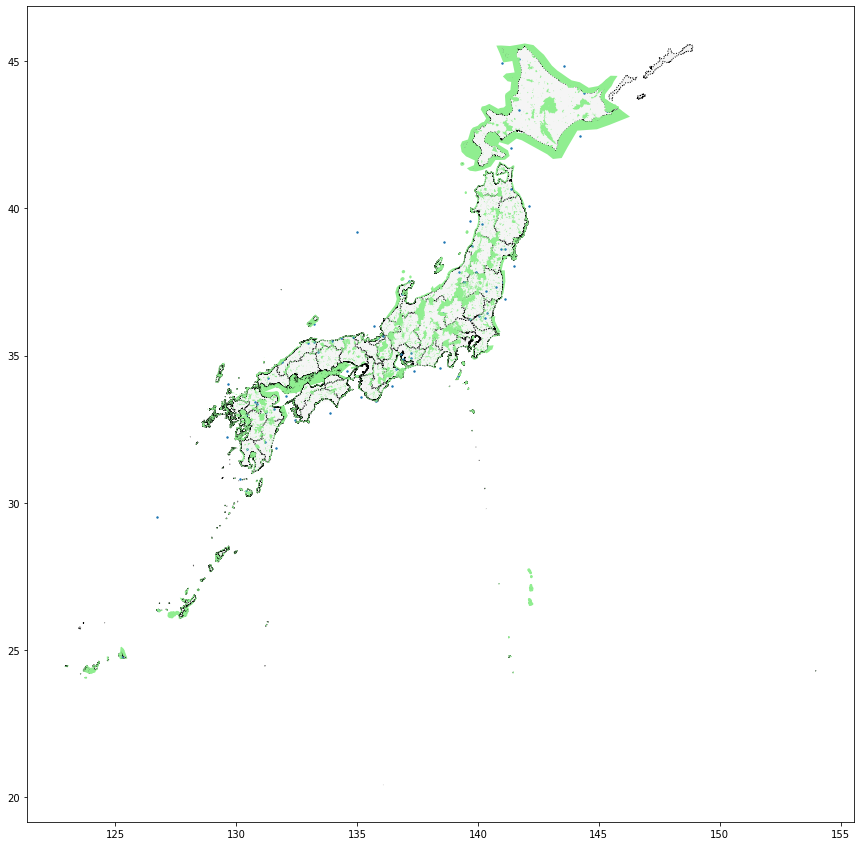

In [26]:
# ax = east_asia.plot(figsize=(10,10), color="whitesmoke", linestyle=":", edgecolor="black")
# japan.plot(color="lightgray", ax=ax)
ax = japan.plot(figsize=(15,15), color="whitesmoke", linestyle=":", edgecolor="black")

protected_areas_pts_japan.plot(markersize=2, ax=ax)
protected_areas_poly_japan.plot(color="lightgreen", ax=ax)